# Part I - Exploratory Data Analysis

## Outline
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project involves univariate, bivariate and multivariate explorations of a dataset containing information of 183,412 individual rides made in a bike-sharing system in February 2019, covering the greater San Francisco Bay area. The columns in the data set and their descriptions are as follows:

Here are the descriptions for each column in your bike-sharing dataset:

- **duration_sec**: The total duration of the bike ride in seconds

- **start_time**: The timestamp indicating when the bike ride started

- **end_time**: The timestamp indicating when the bike ride ended

- **start_station_id**: A unique identifier for the station where the bike ride began

- **start_station_name**: The name of the station where the bike ride began

- **start_station_latitude**: The latitude coordinate of the station where the bike ride began

- **start_station_longitude**: The longitude coordinate of the station where the bike ride began

- **end_station_id**: A unique identifier for the station where the bike ride ended

- **end_station_name**: The name of the station where the bike ride ended

- **end_station_latitude**: The latitude coordinate of the station where the bike ride ended

- **end_station_longitude**: The longitude coordinate of the station where the bike ride ended

- **bike_id**: A unique identifier for the bike used during the ride

- **user_type**: Indicates the type of user, such as "Subscriber" (registered user) or "Customer" (one-time user)

- **member_birth_year**: The year of birth of the user, used to calculate the user's age

- **member_gender**: The gender of the user, typically categorized as "Male", "Female", or "Other"

- **bike_share_for_all_trip**: Indicates whether the ride was part of a program providing free or subsidized bike shares for eligible individuals (e.g., "Yes" or "No")

<a id='wrangling'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load dataset into pandas dataframe

bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# view the shape of the data frame

bikes.shape

(183412, 16)

In [4]:
# view the first few lines of the data

bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# view the info of the data

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
# View the missing data count for each column in the dataframe

bikes.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# percentage of rows with missing data per affected columns over the total rows

columns = ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year', 'member_gender']
for column in columns:
    percent_null = bikes[column].isnull().sum() / len(bikes)
    print('The missing values of {} constitute {:,.2%} of the entire dataset'.format(column, percent_null))

The missing values of start_station_id constitute 0.11% of the entire dataset
The missing values of start_station_name constitute 0.11% of the entire dataset
The missing values of end_station_id constitute 0.11% of the entire dataset
The missing values of end_station_name constitute 0.11% of the entire dataset
The missing values of member_birth_year constitute 4.51% of the entire dataset
The missing values of member_gender constitute 4.51% of the entire dataset


> Due to the low percentages of missing values in applicable columns, the affected rows would be dropped instead

In [8]:
# drop all rows with missing data

bikes.dropna(inplace = True)

#### Create new columns for the age, start days and start hours of the rides to aid in the analysis

In [9]:
# create 'age' column using member_birth_year and year 2019 to display the ages of the individuals

bikes['age'] = 2019 - bikes['member_birth_year']

In [10]:
# create 'start_day' column having the days the rentals were made

bikes['start_day'] = pd.DatetimeIndex(bikes['start_time']).day_name()

In [11]:
# create 'start_hour' column having the hour mark the rentals were made

bikes['start_hour'] = pd.DatetimeIndex(bikes['start_time']).hour

#### Convert datatypes of specific columns to correct datatypes

In [12]:
# Convert user_type, member_gender, bike_share_for_all_trip and start_day columns to category datatype

to_category = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'start_day']
for category in to_category:
    bikes[category] = bikes[category].astype('category')

In [13]:
# Convert start_time and end_time columns to datetime datatype

to_date = ['start_time', 'end_time']
for date in to_date:
    bikes[date] = pd.to_datetime(bikes[date])

In [14]:
# Convert start_station_id, end_station_id and bike_id columns to object datatype

to_object = ['start_station_id', 'end_station_id', 'bike_id']
for obj in to_object:
    bikes[obj] = bikes[obj].astype('object')

In [15]:
# Convert member_birth_year to integer datatype

bikes['member_birth_year'] = bikes['member_birth_year'].astype('int')

In [16]:
# view the updated info of the dataframe to confirm changes have been implemented

bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
age                        174952 non-null float64
start_day     

In [17]:
# view the descriptive statistics for numeric variables

bikes.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,age,start_hour
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,34.196865,13.456165
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,10.118731,4.734282
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,18.000000,0.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,27.000000,9.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,32.000000,14.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,39.000000,17.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,141.000000,23.000000


### Structure of the dataset

> The original dataset contained 183,412 bike rentals and 16 features. After removing rows with missing data, and creating three new columns, the dataset now contains 174,592 bike rentals with 19 features. Most variables are numeric in nature, while others are objects, datetimes and nominal categories.

### Main feature(s) of interest in the dataset

> My main feature of interest is the user_type feature. I am interested in exploring the differences in bike rentals between subscribers and customers.

### Features in the dataset that will help support the investigation into the feature(s) of interest

> I expect member gender, age, start days and start hours to be the most supporting features in the dataset.

<a id='univariate'></a>
## Univariate Exploration

#### Start with an exploration of the distribution of the main feature of interest

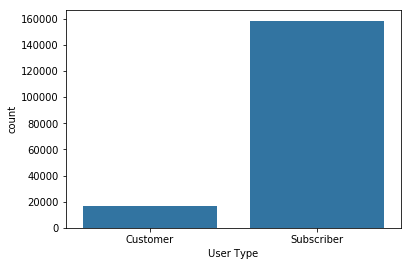

In [18]:
# plot a bar chart of the user_type feature

base_color = sb.color_palette()[0]

sb.countplot(data = bikes, x = 'user_type', color = base_color)
plt.xlabel('User Type');

> The plot above shows a huge variance between the number or rentals made by subscribers and those made by customers, indicating that majority of the rentals made in February 2019 were done by subscribers.

#### Explore the distribution of other features of interest

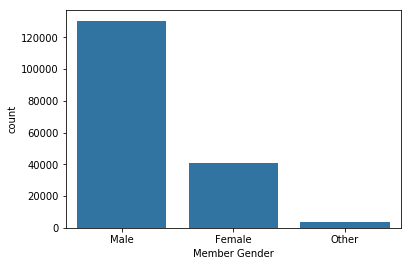

In [19]:
# plot a bar chart of the member_gender feature

freq = bikes['member_gender'].value_counts()

# Get the indexes of the Series
gender_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data = bikes, x = 'member_gender', color = base_color, order = gender_order)
plt.xlabel('Member Gender');

> The bar chart above shows that majority of the rentals made were done by males. The plot also shows how the female rentals were about three times less than male rentals, while few individuals selected other as their gender

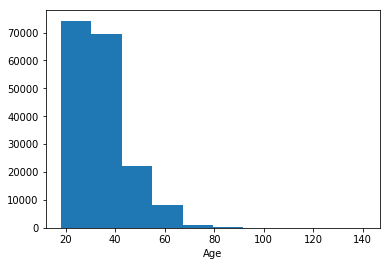

In [20]:
# plot a histogram of the age distribution

plt.hist(data = bikes, x = 'age')
plt.xlabel('Age');

In [21]:
# view the maximum age in the dataset
bikes.age.max()

141.0

> The age distribution is unimodal and rightly skewed. This is due to the low number of rentals made by individuals aged around 70 and above. Using an average life expectancy of 80 years, all rentals of individuals aged 80 and above will be dropped

In [22]:
# drop rentals made by people aged 80 and above

bikes = bikes[bikes['age'] < 80] 

In [23]:
# confirm the new maximum age
bikes.age.max()

78.0

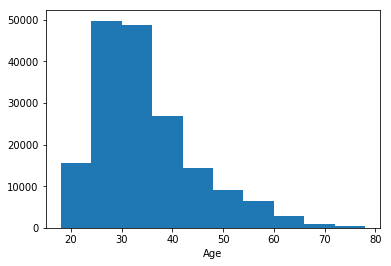

In [24]:
# plot a new histogram of the age distribution

plt.hist(data = bikes, x = 'age')
plt.xlabel('Age');

> The above plot shows that most rentals were made by individuals between the late twenties and early thirties. The revised plot is still unimodal and rightly skewed; however, this is expected, as the physical capabilities needed to ride bikes declines in individuals as they grow older

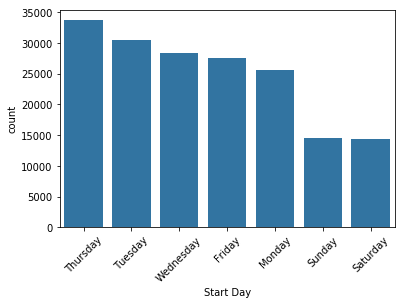

In [25]:
# plot a bar chart of the start_day feature

freq = bikes['start_day'].value_counts()

# Get the indexes of the Series
day_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data = bikes, x = 'start_day', color = base_color, order = day_order)

plt.xticks(rotation = 45)
plt.xlabel('Start Day');

> The above plot shows that highest rentals occured during the working days of the week, particularly Thursdays while fewest rentals occured during the weekends

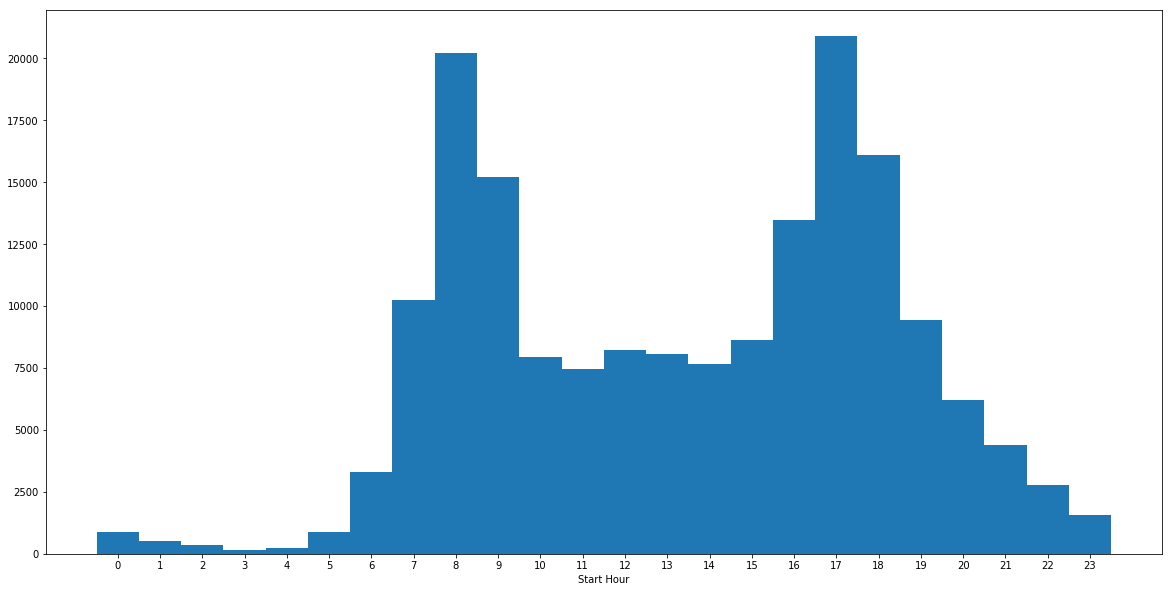

In [26]:
# plot a distribution of the start_hour feature

plt.figure(figsize = [20, 10])
bin_edges = np.arange(-0.5, 23.5+1, 1)
plt.hist(data=bikes, x='start_hour', bins = bin_edges);
plt.xticks(np.arange(0, 23+1, 1))
plt.xlabel('Start Hour');

> The plot above shows a bi modal distribution for the hours in which rentals were made, with peaks at the 8th hour (8am) and the 17th hour (5pm). Also, fewest rentals were made between midnight and the early hours of the day.

### Univariate Exploration Summary

> The distribution of user type in the dataset showed that subscribers made about ten times more rentals than customers in February 2019

> There was an unusual distribution of the ages in the dataset, with some rentals being made by individuals aged up to 141 years, which led to a very extensive range of outliers. To address this unusual outliers, an average life expectancy of 80 years for San Francisco individuals was applied, and all rentals of individuals aged 80 and above were dropped from the dataset

<a id='bivariate'></a>
## Bivariate Exploration

#### Start by exploring relationships between the main feature of interest and the supporting features of interest in the dataset

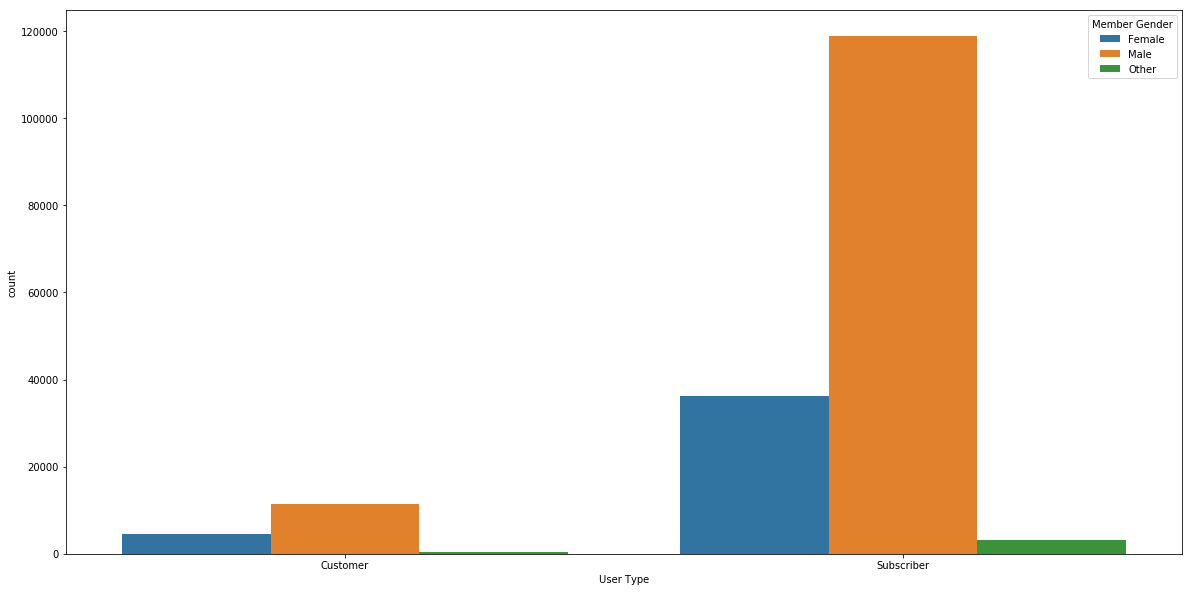

In [27]:
# plot a clustered bar of user type and gender

def clustered_bar_chart(x, hue):
    plt.figure(figsize=(20, 10))
    sb.countplot(data = bikes, x = x, hue = hue)

clustered_bar_chart('user_type', 'member_gender')
plt.xlabel('User Type')
plt.legend(title = 'Member Gender');

> There is a similar distribution of gender across the two user types. For both customers and subscribers, a higher number of rentals were made by males with a smaller number of rentals made by females, while rentals made by others were very little in comparison to the other genders

> This shows that the high proportion of rentals made by males in the univariate plot of gender distribution is irrespective of user type

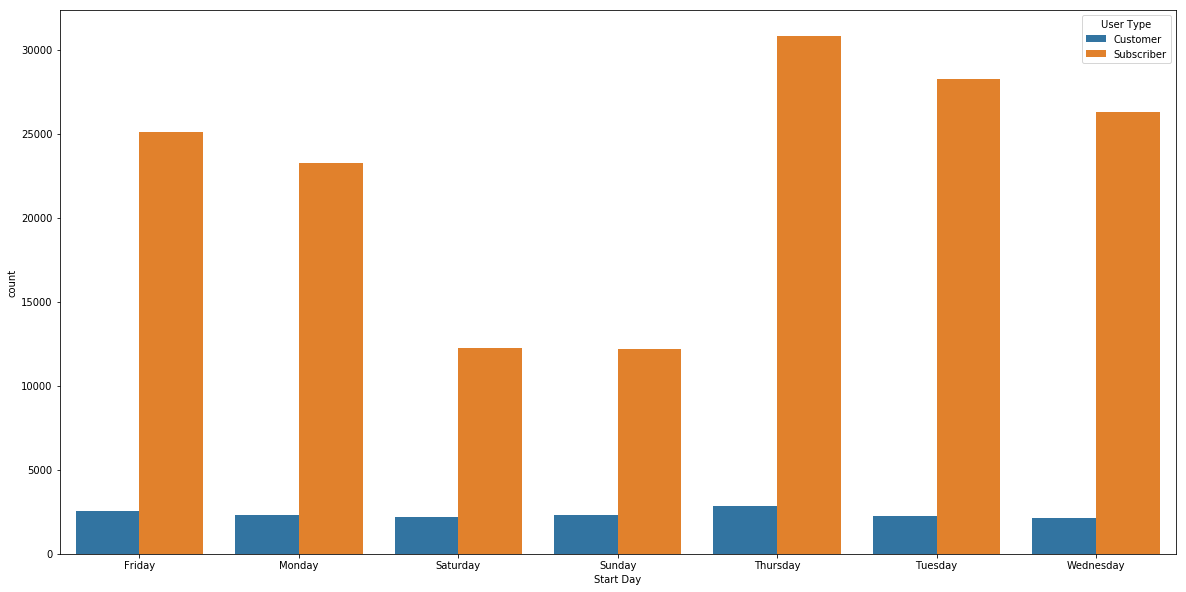

In [28]:
# plot a clustered bar of user_type and start_day

clustered_bar_chart('start_day', 'user_type')
plt.xlabel('Start Day')
plt.legend(title = 'User Type');

> The clustered bar chart above shows that subscribers made higher rentals across all days of the week, with no exceptions on any day.

> In addition, the highest rentals made by subcribers and customers through the month each happened on Thursdays 

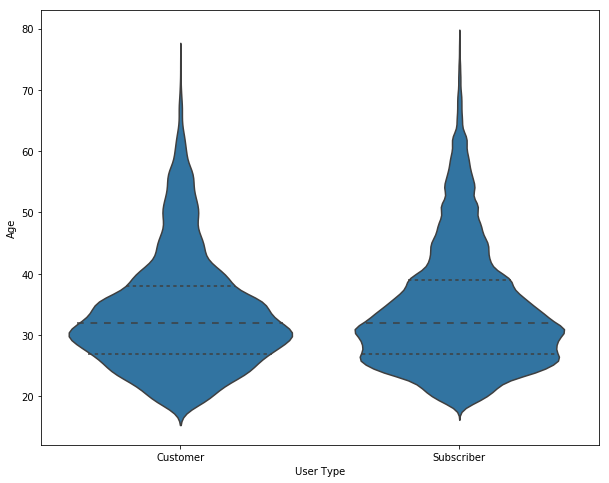

In [29]:
# plot a violin plot of age against user_type

plt.figure(figsize=(10, 8))

sb.violinplot(data = bikes, x = 'user_type', y = 'age', color = base_color, inner = 'quartile');
plt.xlabel('User Type')
plt.ylabel('Age');

> The plot above shows that for customers, most rentals were made by people aged 30, with a gradual decline upwards and downwards, while for subscribers, most rentals were made by indiviuals between mid twenties and early thirties. In addition, both categories had longer tails which show that a lot fewer rentals were made as ages increased. Both categories also have very similar quartiles.

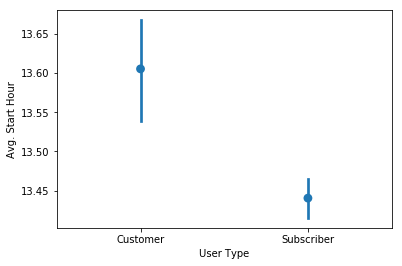

In [30]:
# plot an adapted bar chrt of start_hour against user_type

sb.pointplot(data=bikes, x='user_type', y='start_hour', linestyles = "")
plt.xlabel('User Type')
plt.ylabel('Avg. Start Hour');

> The bar chart above indicates a higher average rental start hour for customers than subscribers. However, subscribers have a lower confidence interval than customers, indicating a more precise average start hour estimate for subscribers.

#### Now explore the relationships between some of the supporting features of interest in the dataset

In [31]:
# use the describe function tobget suitable limits for bins

bikes[['start_hour', 'age']].describe()

,start_hour,age
count,174749.000000,174749.000000
mean,13.456106,34.122335
std,4.735567,9.871342
min,0.000000,18.000000
25%,9.000000,27.000000
50%,14.000000,32.000000
75%,17.000000,39.000000
max,23.000000,78.000000


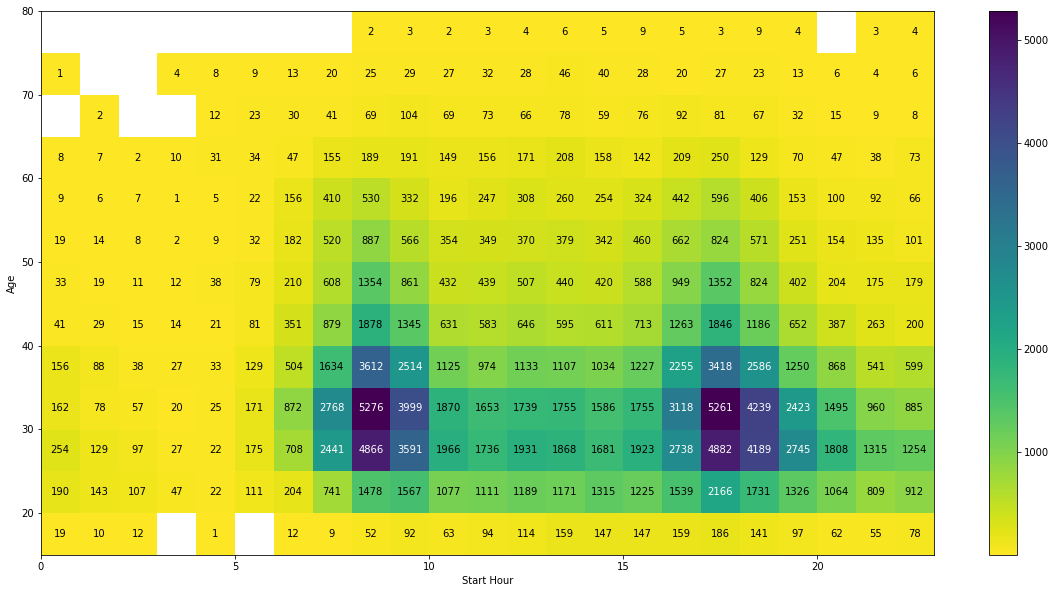

In [32]:
# plot a heatmap of age against start_hour

bins_x = np.arange(0, 23+1, 1)
bins_y = np.arange(15, 78+5, 5)

plt.figure(figsize=(20, 10))
h2d = plt.hist2d(data = bikes, x = 'start_hour', y = 'age', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Start Hour')
plt.ylabel('Age');


counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 2000: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+2.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+2.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

> The heat map above shows that individuals in the late 20s and early 30s made the most rentals in the two peak periods of the 8th hour (8am) and the 17th hour (5pm). A high number of rentals were also made in the hours preceding and suceeding the two peak periods. The fewest rentals across all ages were generally made between midnight and the early hours of the day that followed, as abserved in the age distribution histogram earlier plotted.

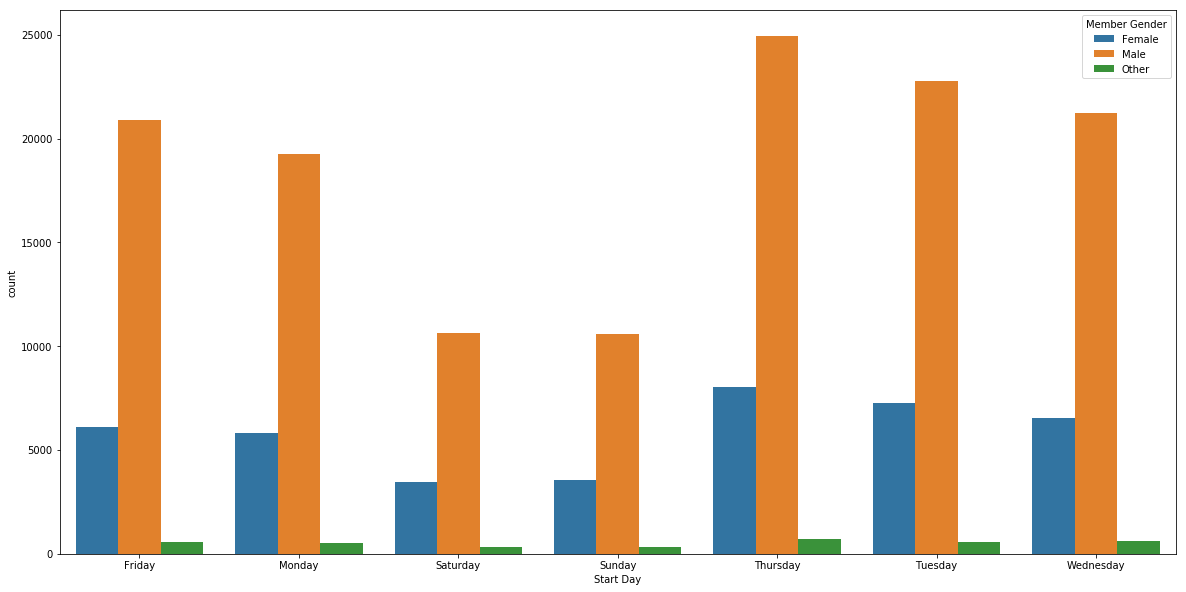

In [33]:
# plot a clustered bar of start_day and member_gender

clustered_bar_chart('start_day', 'member_gender')
plt.xlabel('Start Day')
plt.legend(title = 'Member Gender');

> The above clustered bar chart shows a similar distribution of gender, as seen in previous plots, across all days of the week. In addition, the highest rentals made by all genders (male, female and other) through the month each happened on Thursdays

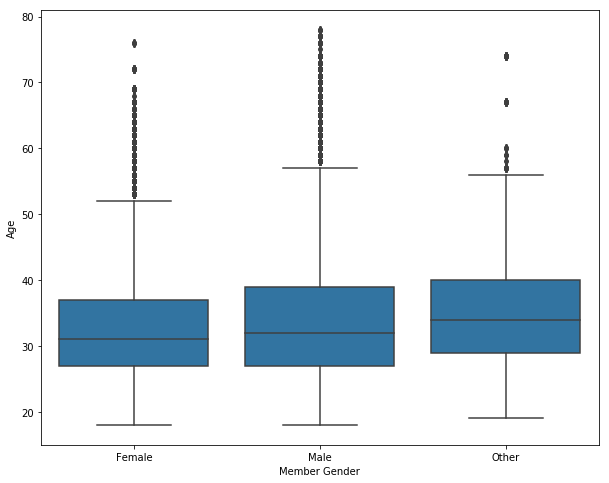

In [34]:
# plot a box plot of age against member_gender

plt.figure(figsize=(10, 8))

sb.boxplot(data = bikes, x = 'member_gender', y = 'age', color = base_color)
plt.xlabel('Member Gender')
plt.ylabel('Age');

> The boxplots above show that females had the lowest median age that made rentals, followed by males which was slightly higher, while others had the highest median age, with all median ages being in the early thirties. 

> There were many outliers across the three gender categories, indicating the drastic reduction in rentals as ages reduced, similar to the observation made in the violin plot of user type and age. 

### Bivariate Exploration Summary

> In exploring the relationships between the main feature of interest and supporting features, a similar distribution of gender across the two user types was observed, with males making the highest rentals, followed by females and then others having the lowest rentals. It was also observed that subscribers made higher rentals across all days of the week than customers, with no exceptions on any day. Also, both user types had median ages of about 30 years while fewer rentals were made as ages increased. In addition, customers generally rented bikes shortly later in the day than subcribers did

> In exploring the relationships between supporting features, it was observed that individuals in the late 20s and early 30s made the most rentals in the two peak periods of the 8th hour (8am) and the 17th hour (5pm), while rentals were not really made till day break. There was also a similar distribution of gender, as seen in previous plots, across all days of the week. In addition, Thursdays had the highest rentals made by each gender. The median ages across all genders were in the early thirties.

<a id='multivariate'></a>
## Multivariate Exploration

#### Start by exploring the difference, if any, in age distribution across customers and subscribers, based on the different genders

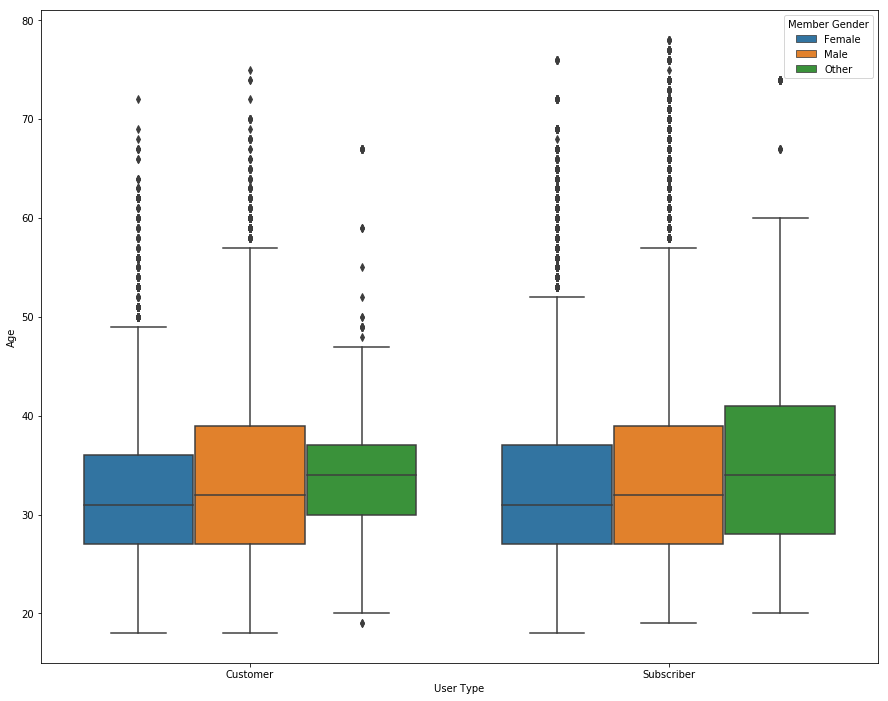

In [35]:
# plot box plots of age against user_type and segment on the different genders

plt.figure(figsize=(15, 12))
sb.boxplot(data=bikes, x='user_type', y='age', hue = 'member_gender')
plt.xlabel('User Type')
plt.ylabel('Age')
plt.legend(title = 'Member Gender');

> The boxplots above show that for both user types, females had the lowest median age that made rentals, followed by males which was slightly higher, while others had the highest median age, with all median ages being in the early thirties. The females in both user types had similar quartiles, males in both user types also had similar quartiles; however, the other category had smaller quartiles in customers than in subscribers. Also, all genders across both customers and subsribers had outliers due to the drastic reduction in rentals as ages increased.

#### Explore the distribution of ages for customers and subscribers across all days of the week

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


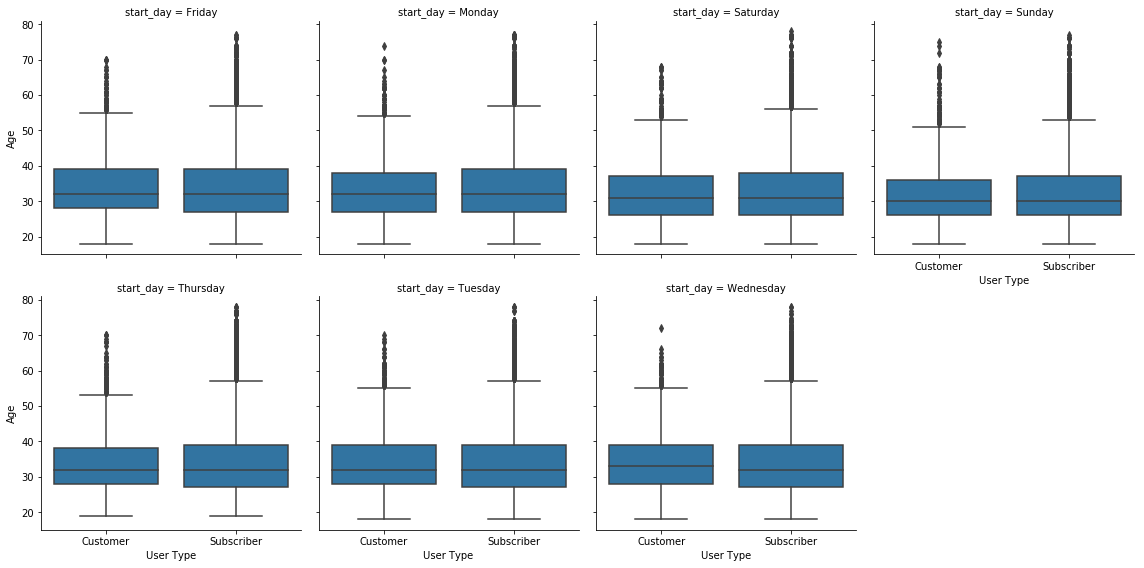

In [36]:
# plot boxplots of age against user_type and facet by start_day


g = sb.FacetGrid(data = bikes, col = 'start_day', col_wrap = 4, size = 4)
g.map(sb.boxplot, 'user_type', 'age')
g.set_axis_labels("User Type", "Age");

> The above indicates similar box plots across all days of the week, with very negligible differences in quartiles and whiskers.

#### Explore the average rental start hours distribution across customers and subscribers, based on start days and genders

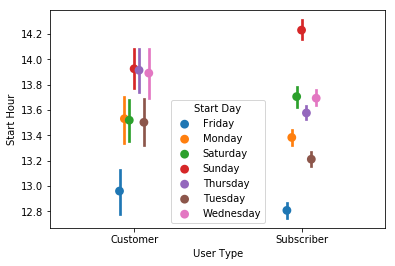

In [37]:
# plot point plot of start_hour against user_type and segment on start_day

sb.pointplot(data=bikes, x='user_type', y='start_hour', hue = 'start_day', linestyles = "", dodge = True)
plt.xlabel('User Type')
plt.ylabel('Start Hour')
plt.legend(title = 'Start Day', loc = 0);

> The above plot shows the that customers had their highest average rental start hours on Sundays, Thursdays and Wednesdays, with similar confidence intervals across all days of the week

> On the other hand, the highest average rental start hours for subscribers were on Sundays, with similar confidence intervals across all days of the week also.

> Both customers and subscribers had their lowest average rental start hours on Fridays, indicating individuals rented bikes at earlier times on Fridays in comparison to other days of the week

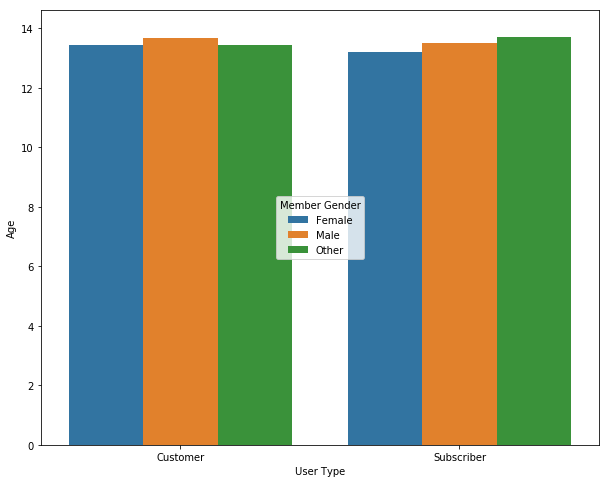

In [38]:
# plot adapted bar charts of start_hour against user_type and segment on start_day

plt.figure(figsize=(10, 8))
sb.barplot(data=bikes, x='user_type', y='start_hour', hue = 'member_gender', errwidth = 0)
plt.xlabel('User Type')
plt.ylabel('Age')
plt.legend(title = 'Member Gender', loc = 10);

> The above shows that for customers, males had the highest average rental start hours while females and others had very similar average rental start hours. However, for subscribers, females had the lowest average, followed by males, with others having the highest average rental start hours

### Multivariate Exploration Summary

> The median ages in the distribution was strengthened in the box plots of age against user type, segmented by gender, with all genders having median ages in the early thirties. 
Faceting boxplots of age against user type by start day showed that the age distribution across all days of the week for both user types were basically the same, with no exceptions

> An interesting interaction was the highest average rental start hours for subscribers happening on Sundays while the lowest for both subscribers and customers happening on Fridays.

<a id='conclusion'></a>
## Conclusion
> The exploration of a dataset containing information of individual rides made in a San Francisco Bay area bike-sharing system in February 2019 generated a number of meaningful insights. These insights were gotten by having univariate explorations of the main and supporting features of interest, followed by bivariate explorations of these features, and then concluded with multivariate explorations of the features.

> The main finding indicated that the sharing system was used majorly by subscribers. The distribution of user type in the dataset showed that subscribers made about ten times more rentals than customers in February 2019. Also, on a gender basis, most rentals were made by males, followed by females, with the others category making the least rentals. Most rentals were also made by adults with ages ranging between the late twenties and early thirties. In addition, it was observed that most rentals were made on Thursdays.